In [5]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
# Bring utils package onto the path
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from utils import DataLoader, RunModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def train_dataset(filename, label):
    data_loader = DataLoader()
    data_loader.load_data(f"data/{filename}.csv")
    X_train, X_test, y_train, y_test = data_loader.get_data_split(label=label)
    print(f'Training data: {X_train.shape}')
    print(f'Testing data: {X_test.shape}')
    
    rf = RunModel()
    rf.run_model(X_train, X_test, y_train)
    rf.model_performance(X_test , y_test)
    return rf, X_train, X_test, y_train, y_test

### Single Modalities

In [7]:
print("MRI Data - MCI TO NC")
mri_rf, mri_X_train, mri_X_test, mri_y_train, mri_y_test = train_dataset('sMRI_MCI_NC', 'MCI')
mri_rf.save_model('models/sMRI_RF', mri_X_train, mri_X_test, mri_y_train, mri_y_test)
print(f"Accuracy: {mri_rf.accuracy}. F1-Score: {mri_rf.f1}. AUC: {mri_rf.auc}")

MRI Data - MCI TO NC
Training data: (3567, 35)
Testing data: (892, 35)
Saved.
Accuracy: 0.7466367713004485. F1-Score: 0.7167919799498748. AUC: 0.816115452787625


In [8]:
print("Neuro Data - MCI TO NC")
neuro_rf, neuro_X_train, neuro_X_test, neuro_y_train, neuro_y_test = train_dataset('Neuro_MCI_NC', 'MCI')
neuro_rf.save_model('models/neuro_RF', neuro_X_train, neuro_X_test, neuro_y_train, neuro_y_test)
print(f"Accuracy: {neuro_rf.accuracy}. F1-Score: {neuro_rf.f1}. AUC: {neuro_rf.auc}")

Neuro Data - MCI TO NC
Training data: (3567, 3)
Testing data: (892, 3)
Saved.
Accuracy: 0.5044843049327354. F1-Score: 0.4609756097560976. AUC: 0.5150509587495972


### Multimodal Dataset (Early Fusion)

In [22]:
print("Multimodal Data - MCI TO NC")
multimodal_rf, X_train, X_test, y_train, y_test = train_dataset('ADNI_MCI_NC', 'MCI')
multimodal_rf.save_model('models/ADNI_MCI_NC', X_train, X_test, y_train, y_test)
print(f"Accuracy: {multimodal_rf.accuracy}. F1-Score: {multimodal_rf.f1}. AUC: {multimodal_rf.auc}")

Multimodal Data - MCI TO NC
Training data: (2752, 40)
Testing data: (688, 40)
Saved.
Accuracy: 0.8561046511627907. F1-Score: 0.8805790108564536. AUC: 0.9396420343788765


In [10]:
X_train.head()

,AD,Age,MMSE,ADAS11,ADAS13,TotalICVolume,3rdVentricle,4thVentricle,RightAccumbensArea,LeftAccumbensArea,...,LeftPutamen,RightThalamusProper,LeftThalamusProper,RightVentralDC,LeftVentralDC,LeftBasalForebrain,RightBasalForebrain,Right Cortex,Left Cortex,Cerebellar Vermis
1344,0,69.000000,28.0,13.67,20.935679,1214750.869,3113.418157,2547.972993,189.373547,192.801500,...,2614.525463,6523.396124,7920.579936,4684.340702,5112.333278,270.641135,198.821322,233575.0881,217262.2083,9255.475320
27,0,76.817043,26.0,5.00,10.000000,1214750.869,2349.333922,2110.129014,325.855666,237.984475,...,3988.375719,6496.365958,6500.027257,4198.290230,4593.710589,346.603031,380.775160,265928.7344,259863.1813,12406.923980
3046,0,71.088227,26.0,8.00,13.000000,1214750.869,2736.065899,3091.119226,349.381549,325.560080,...,3864.749800,6552.038404,6614.427966,4309.417226,4434.196351,416.308534,497.982143,246751.8535,244934.6157,8782.181669
749,0,71.302053,28.0,4.00,5.000000,1214750.869,1743.450090,2215.042768,270.051916,299.361987,...,3310.767529,5381.982244,4590.428861,4252.954709,4532.716153,323.862664,265.151781,244619.4867,254207.4187,8962.710946
507,0,83.400000,27.0,8.00,16.000000,1214750.869,2519.358378,2855.463364,235.216330,293.329720,...,3551.013960,5453.227185,5284.222014,4026.591083,4252.661699,363.542128,316.670344,243523.4958,241255.5493,8325.076620


#### Hyperparameter Tuning - Grid Search

In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at each split
max_features = ['auto', 'sqrt']
# Max depth in tree
max_depth = [None, 2, 4]
# Min num samples to split a node
min_samples_split = [2, 5]
# Min num samples at each leaf node
min_samples_leaf = [1, 2]
# Choice to boostrap for sample selection
bootstrap = [True, False]

In [12]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
            }
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_gr_model = RandomForestClassifier()
rf_gr = GridSearchCV(estimator=rf_gr_model, param_grid=param_grid, cv=10, verbose=2, n_jobs=4)
rf_gr.fit(X_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [14]:
rf_gr_pred = rf_gr.predict(X_test)
accuracy = accuracy_score(y_test, rf_gr_pred)
f1 = f1_score(y_test, rf_gr_pred)
rf_gr_probs = rf_gr.predict_proba(X_test)
rf_gr_probs = rf_gr_probs[:, 1]
rf_gr_auc = roc_auc_score(y_test, rf_gr_probs)
print(f"Accuracy: {accuracy}. F1-Score: {f1}. AUC: {rf_gr_auc}")

Accuracy: 0.8677325581395349. F1-Score: 0.8904933814681107. AUC: 0.9412280701754386


In [15]:
rf_gr.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

## Performance Measures

#### Load best model

#### Confusion Matrix

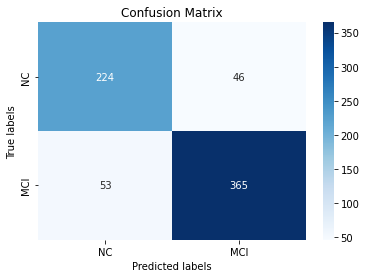

In [17]:
import seaborn as sn
cm = confusion_matrix(y_test, multimodal_rf.prediction)
ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NC', 'MCI']); ax.yaxis.set_ticklabels(['NC', 'MCI']);

plt.savefig('plots/MCINC-ConfusionMatrix.png')

#### ROC curve
Plots the **False Positive Rate (FPR)** on the x-axis and the **True Positive Rate (TPR)** on the y-axis.

In [18]:
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))

Random (chance) Prediction: AUROC = 0.500


In [19]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, multimodal_rf.probs)
mri_fpr, mri_tpr, _ = roc_curve(mri_y_test, mri_rf.probs)
neuro_fpr, neuro_tpr, _ = roc_curve(neuro_y_test, neuro_rf.probs)

rf_gr_fpr, rf_gr_tpr, _ = roc_curve(y_test, rf_gr_probs)

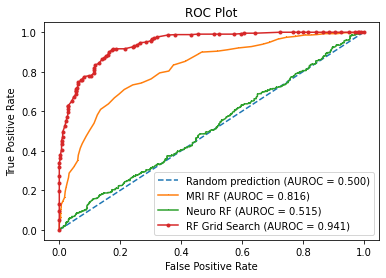

In [21]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
# plt.plot(rf_fpr, rf_tpr, marker=',', label='Fusion RF (AUROC = %0.3f)' % multimodal_rf.auc)
plt.plot(mri_fpr, mri_tpr, marker=',', label='MRI RF (AUROC = %0.3f)' % mri_rf.auc)
plt.plot(neuro_fpr, neuro_tpr, marker=',', label='Neuro RF (AUROC = %0.3f)' % neuro_rf.auc)
plt.plot(rf_gr_fpr, rf_gr_tpr, marker='.', label='RF Grid Search (AUROC = %0.3f)' % rf_gr_auc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('plots/MCINC-ROCCurve.png')
plt.show()